# Regularization

Overfitting occurs when the model used to fit the data becomes too complex, to the point where it's way too specific. We want the fitting function to perform well but not be too complicated.

The way we can do this is by adding a **regularization term** to the loss.

Let's see how this works by generating a dataset and fitting a very complex function to it.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [94]:
def generate_data():
    n_data_points = 20
    x = [i*5 for i in list(range(n_data_points))]
    y = [-1.2*i**2 + 53*i + (np.random.rand()-0.5)*3000 for i in x]
    return x, y

In [95]:
x, y = generate_data()

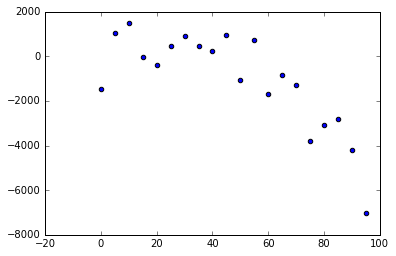

In [96]:
plt.scatter(x, y)

Here we choose an 20th order polynomial function with a scaling factor in front of each term that grows with the power. This scaling factor prevents us from having to use ridiculously small learning rates for high-order equations, and also prevents selective fitting of higher-order parameters.

In [286]:
n_parameters = 20
parameters = np.random.rand(n_parameters)
def polynomial(x):
    y = 0
    for p in range(n_parameters):
        y += parameters[p] * (x/100)**(p)
    return y
def model(x):
    return [polynomial(i) for i in x]
def loss(y_guess, y):
    diff_squared = [(i-j)**2 for i, j in zip(y_guess, y)]
    return sum(diff_squared)/len(y)
learning_rate = 0.5
loss_history = []
def gradient_descent(y_guess):
    global parameters
    for p in range(n_parameters):
        grad = 2*sum([(i-j)*(x/100)**p for i, j, x in zip(y_guess, y, x)])/len(y)
        parameters[p] -= grad * learning_rate
def train():
    for i in range(5000):
        y_guess = model(x)
        current_loss = loss(y_guess, y)
        loss_history.append(current_loss)
        gradient_descent(y_guess)

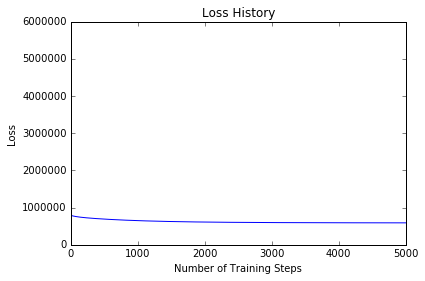

In [287]:
train()
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Number of Training Steps")
plt.ylabel("Loss")

[ -336.35891048  6285.31635644 -7632.33414306 -6416.63535796 -3611.96804
  -696.01983904  1600.60099669  3037.12677783  3657.22029063  3617.8497456
  3096.02117439  2253.41011561  1223.01630204   106.57290101 -1021.8474151
 -2111.03088722 -3124.72465826 -4043.32381241 -4855.28569767 -5556.64936883]


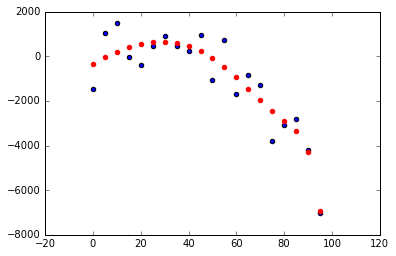

In [288]:
print(parameters)
plt.scatter(x, y)
plt.scatter(x, model(x), color='red')

This fit looks pretty good, but let's zoom out.

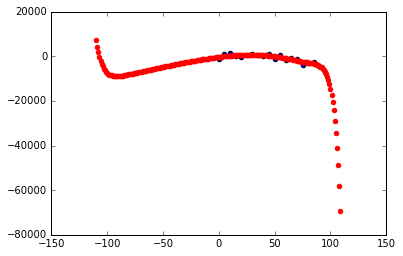

In [289]:
plt.scatter(x, y)
x_extended = list(range(-110,110))
plt.scatter(x_extended, model(x_extended), color='red')

In this case, the function fit was overfit and not very good outside of the range where it was trained. The algorithm tried too hard to fit the extra terms in the equation.

We can add a **regularization term** to the loss function, which discourages the model from using too many terms. Specifically, we can penalize high-order terms by introducing a regularization term that scales with the polynomial order.

In [241]:
def loss(y_guess, y):
    diff_squared = [(i-j)**2 for i, j in zip(y_guess, y)]
    regularization = 0
    for p in range(n_parameters):
        regularization += (parameters[p]**2)*(2**p)/100000
    return (sum(diff_squared))/len(y) + regularization
def gradient_descent(y_guess):
    global parameters
    for p in range(n_parameters):
        grad = (2*sum([(i-j)*(x/100)**p for i, j, x in zip(y_guess, y, x)]))/len(y) + 2*parameters[p]*(2**p)/100000
        parameters[p] -= grad * learning_rate

In [248]:
n_parameters = 20
parameters = np.random.rand(n_parameters)
def polynomial(x):
    y = 0
    for p in range(n_parameters):
        y += parameters[p] * (x/100)**(p)
    return y
def model(x):
    return [polynomial(i) for i in x]
learning_rate = 0.01
loss_history = []
def train():
    for i in range(1000):
        y_guess = model(x)
        current_loss = loss(y_guess, y)
        loss_history.append(current_loss)
        gradient_descent(y_guess)

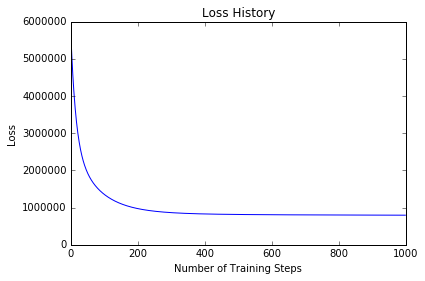

In [249]:
train()
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Number of Training Steps")
plt.ylabel("Loss")

[  5.28444420e+02  -6.06886366e+02  -1.11325189e+03  -1.16019923e+03
  -1.08288007e+03  -9.77173741e+02  -8.73051530e+02  -7.79225162e+02
  -6.92489754e+02  -6.07053104e+02  -5.14781746e+02  -4.04726783e+02
  -2.73472275e+02  -1.39108804e+02  -4.70235781e+01  -1.41084118e+01
  -6.30864977e+00  -3.21540259e+00  -1.65338423e+00  -8.46792736e-01]


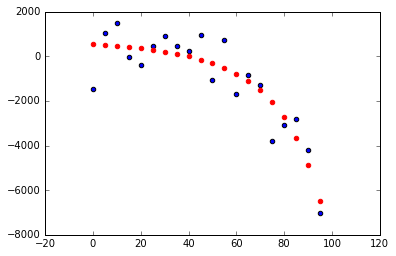

In [250]:
print(parameters)
plt.scatter(x, y)
plt.scatter(x, model(x), color='red')

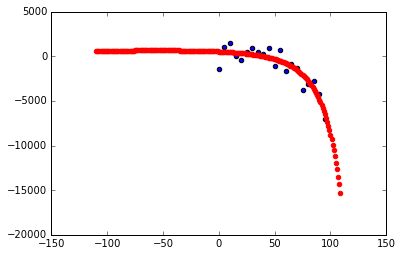

In [251]:
plt.scatter(x, y)
x_extended = list(range(-110,110))
plt.scatter(x_extended, model(x_extended), color='red')

This curve looks much nicer, and behaves well outside the original training range.